## Importing Libraries

In [ ]:
# <==== Importing Neccesary libraries ===>
import os
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from PIL import Image
import random
from random import shuffle
import cv2
from tqdm import tqdm
from PIL import Image
from random import shuffle
from scipy import interp
from itertools import cycle

# <==== Tensorflow & Machine Learning lib ===>
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# <==== Performance Metrics ===>
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

## Data Loading & Preprocessing

In [ ]:
# <==== setting path of directory ===>
B_DIR = "ISIC_2019_ML/Bcc"
M_DIR = "ISIC_2019_ML/Melanoma"
N_DIR = "ISIC_2019_ML/Navus"
I_Var = "ISIC_2019_ML/isic_vars"

In [ ]:
# Collecting files from the directories and storing them in the respective variables for direct access to the images.
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)

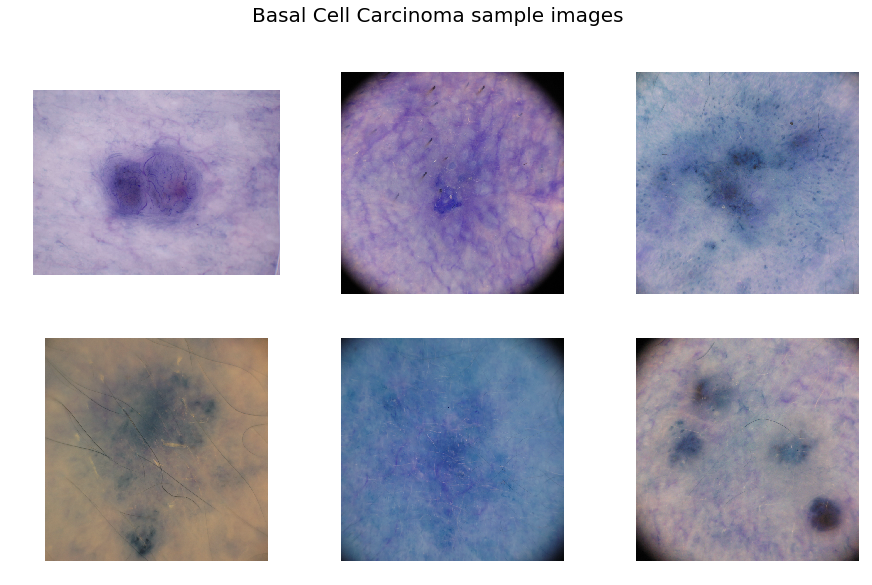

In [ ]:
# sample_parasite = random.sample(Bimages,6)
# f,ax = plt.subplots(2,3,figsize=(15,9))

# for i in range(0,6):
#     im = cv2.imread(B_DIR+"/"+sample_parasite[i])
#     ax[i//3,i%3].imshow(im)
#     ax[i//3,i%3].axis('off')
# f.suptitle('Basal Cell Carcinoma sample images',fontsize=20)
# plt.show()

# Selecting a random sample of images from the list of files in B_DIR
sample_parasite = random.sample(Bimages, 6)

# creating a 2x3 grid of subplots for showing the selected images
figure, axes = plt.subplots(2, 3, figsize=(15, 9))

# Iterating through the list and showing each image
for i in range(0, 6):
    # Reading the image using OpenCV
    image = cv2.imread(B_DIR + "/" + sample_parasite[i])

    # Displaying the image in the subplot
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

figure.suptitle('Basal Cell Carcinoma Sample Images', fontsize=20)
plt.show()

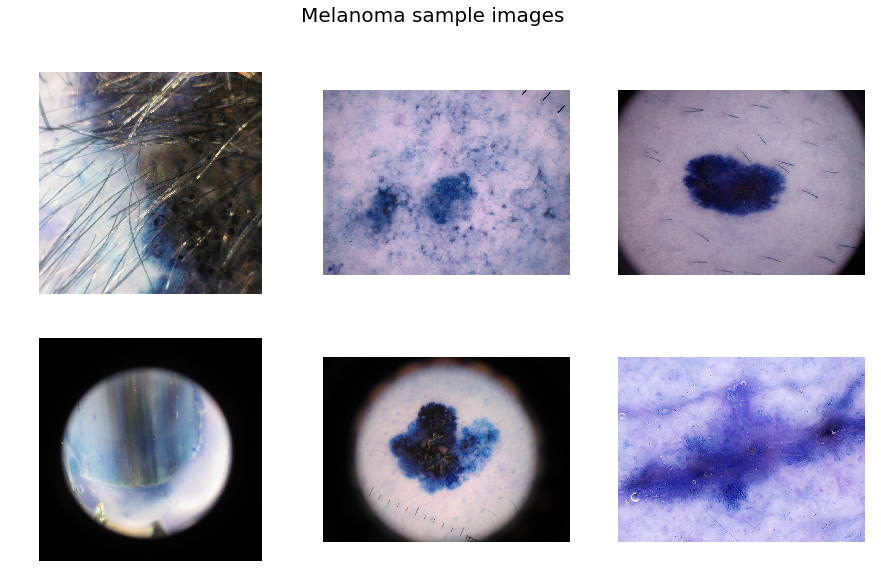

In [ ]:

# sample_parasite = random.sample(Mimages,6)
# f,ax = plt.subplots(2,3,figsize=(15,9))

# for i in range(0,6):
#     im = cv2.imread(M_DIR+"/"+sample_parasite[i])
#     ax[i//3,i%3].imshow(im)
#     ax[i//3,i%3].axis('off')
# f.suptitle('Melanoma sample images',fontsize=20)
# plt.show()

# Selecting a random sample of melanoma images
sample_melanoma = random.sample(Mimages, 6)

# creating a 2x3 grid of subplots for showing the selected images
figure, axes = plt.subplots(2, 3, figsize=(15, 9))

# Iterating through the list and showing each image
for i in range(0, 6):
    # Reading the image using OpenCV
    image = cv2.imread(M_DIR + "/" + sample_melanoma[i])

    # Displaying the image in the subplot
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

figure.suptitle('Melanoma Sample Images', fontsize=20)
plt.show()


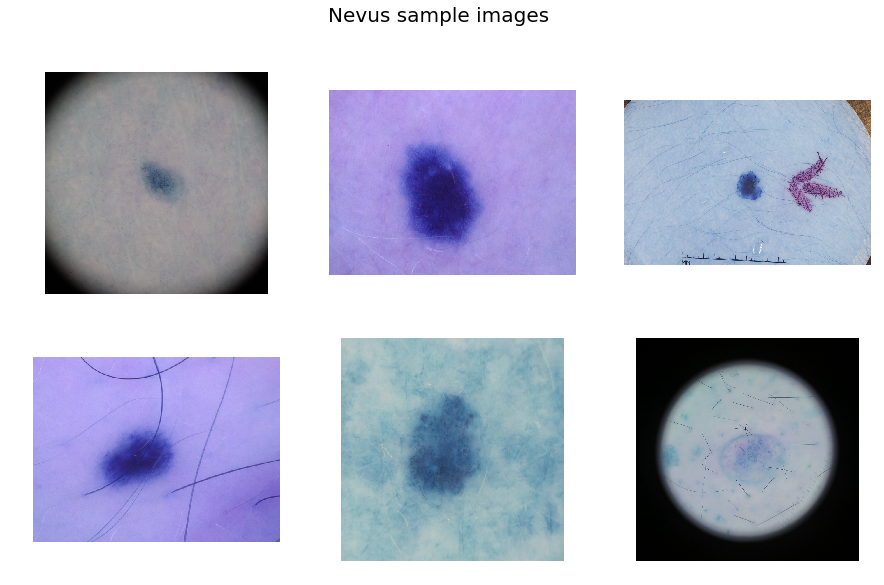

In [ ]:

# sample_parasite = random.sample(Nimages,6)
# f,ax = plt.subplots(2,3,figsize=(15,9))

# for i in range(0,6):
#     im = cv2.imread(N_DIR+"/"+sample_parasite[i])
#     ax[i//3,i%3].imshow(im)
#     ax[i//3,i%3].axis('off')
# f.suptitle('Nevus sample images',fontsize=20)
# plt.show()

# Selecting a random sample of nevus images
sample_nevus = random.sample(Nimages, 6)

# creating a 2x3 grid of subplots for showing the selected images
figure, axes = plt.subplots(2, 3, figsize=(15, 9))

# Iterating through the list and showing each image
for i in range(0, 6):
     # Reading the image using OpenCV
    image = cv2.imread(N_DIR + "/" + sample_nevus[i])

    # Displaying the image in the subplot
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

figure.suptitle('Nevus Sample Images', fontsize=20)
plt.show()

In [ ]:
# creating two empty lists to store image data and corresponding labels
data=[]
labels=[]

# list of filenames in the Basal Cell Carcinoma directory
Basal=os.listdir(B_DIR)

# Iterate through each image file
for a in Basal:
    try:
        # Read the image using OpenCV
        image=cv2.imread(B_DIR+"/"+a)
        # Convert the image to RGB format using Pillow
        image_from_array = Image.fromarray(image, 'RGB')
        # Resize the image to 224x224 pixels
        size_image = image_from_array.resize((224, 224))
        # Add the processed image data to the 'data' list
        data.append(np.array(size_image))
        # label = '0' to the 'labels' list for bcc
        labels.append(0)
        print(a)
        # Print the name of the processed image; to see if there is any error in the files while running
    except AttributeError:
        print("")

# < ============ The above operations have been performed for the other classes below ====>
# list of filenames in the Melanoma directory
Melanoma=os.listdir(M_DIR)
for b in Melanoma:
    try:
        image=cv2.imread(M_DIR+"/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
        print(b)
    except AttributeError:
        print("")
Nevus=os.listdir(N_DIR)
for c in Nevus:
    try:
        image=cv2.imread(N_DIR+"/"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
        print(c)
    except AttributeError:
        print("")

bcc_ISIC_0024331.jpg
bcc_ISIC_0024332.jpg
bcc_ISIC_0024345.jpg
bcc_ISIC_0024360.jpg
bcc_ISIC_0024403.jpg
bcc_ISIC_0024411.jpg
bcc_ISIC_0024431.jpg
bcc_ISIC_0024432.jpg
bcc_ISIC_0024436.jpg
bcc_ISIC_0024443.jpg
bcc_ISIC_0024448.jpg
bcc_ISIC_0024452.jpg
bcc_ISIC_0024454.jpg
bcc_ISIC_0024457.jpg
bcc_ISIC_0024461.jpg
bcc_ISIC_0024472.jpg
bcc_ISIC_0024504.jpg
bcc_ISIC_0024515.jpg
bcc_ISIC_0024550.jpg
bcc_ISIC_0024564.jpg
bcc_ISIC_0024572.jpg
bcc_ISIC_0024573.jpg
bcc_ISIC_0024582.jpg
bcc_ISIC_0024590.jpg
bcc_ISIC_0024595.jpg
bcc_ISIC_0024632.jpg
bcc_ISIC_0024634.jpg
bcc_ISIC_0024665.jpg
bcc_ISIC_0024666.jpg
bcc_ISIC_0024673.jpg
bcc_ISIC_0024743.jpg
bcc_ISIC_0024787.jpg
bcc_ISIC_0024795.jpg
bcc_ISIC_0024799.jpg
bcc_ISIC_0024829.jpg
bcc_ISIC_0024833.jpg
bcc_ISIC_0024848.jpg
bcc_ISIC_0024885.jpg
bcc_ISIC_0024897.jpg
bcc_ISIC_0024931.jpg
bcc_ISIC_0024949.jpg
bcc_ISIC_0024984.jpg
bcc_ISIC_0025019.jpg
bcc_ISIC_0025031.jpg
bcc_ISIC_0025046.jpg
bcc_ISIC_0025102.jpg
bcc_ISIC_0025144.jpg
bcc_ISIC_0025

bcc_ISIC_0031513.jpg
bcc_ISIC_0031520.jpg
bcc_ISIC_0031526.jpg
bcc_ISIC_0031527.jpg
bcc_ISIC_0031531.jpg
bcc_ISIC_0031539.jpg
bcc_ISIC_0031552.jpg
bcc_ISIC_0031569.jpg
bcc_ISIC_0031585.jpg
bcc_ISIC_0031597.jpg
bcc_ISIC_0031614.jpg
bcc_ISIC_0031640.jpg
bcc_ISIC_0031643.jpg
bcc_ISIC_0031651.jpg
bcc_ISIC_0031697.jpg
bcc_ISIC_0031698.jpg
bcc_ISIC_0031712.jpg
bcc_ISIC_0031721.jpg
bcc_ISIC_0031728.jpg
bcc_ISIC_0031749.jpg
bcc_ISIC_0031762.jpg
bcc_ISIC_0031789.jpg
bcc_ISIC_0031824.jpg
bcc_ISIC_0031836.jpg
bcc_ISIC_0031925.jpg
bcc_ISIC_0031943.jpg
bcc_ISIC_0031971.jpg
bcc_ISIC_0031976.jpg
bcc_ISIC_0031986.jpg
bcc_ISIC_0032022.jpg
bcc_ISIC_0032030.jpg
bcc_ISIC_0032061.jpg
bcc_ISIC_0032092.jpg
bcc_ISIC_0032132.jpg
bcc_ISIC_0032139.jpg
bcc_ISIC_0032146.jpg
bcc_ISIC_0032164.jpg
bcc_ISIC_0032174.jpg
bcc_ISIC_0032185.jpg
bcc_ISIC_0032194.jpg
bcc_ISIC_0032222.jpg
bcc_ISIC_0032225.jpg
bcc_ISIC_0032246.jpg
bcc_ISIC_0032290.jpg
bcc_ISIC_0032302.jpg
bcc_ISIC_0032307.jpg
bcc_ISIC_0032314.jpg
bcc_ISIC_0032

bcc_ISIC_0055396.jpg
bcc_ISIC_0055397.jpg
bcc_ISIC_0055399.jpg
bcc_ISIC_0055401.jpg
bcc_ISIC_0055409.jpg
bcc_ISIC_0055418.jpg
bcc_ISIC_0055441.jpg
bcc_ISIC_0055444.jpg
bcc_ISIC_0055455.jpg
bcc_ISIC_0055471.jpg
bcc_ISIC_0055483.jpg
bcc_ISIC_0055485.jpg
bcc_ISIC_0055493.jpg
bcc_ISIC_0055497.jpg
bcc_ISIC_0055509.jpg
bcc_ISIC_0055510.jpg
bcc_ISIC_0055529.jpg
bcc_ISIC_0055539.jpg
bcc_ISIC_0055554.jpg
bcc_ISIC_0055555.jpg
bcc_ISIC_0055567.jpg
bcc_ISIC_0055584.jpg
bcc_ISIC_0055600.jpg
bcc_ISIC_0055604.jpg
bcc_ISIC_0055606.jpg
bcc_ISIC_0055614.jpg
bcc_ISIC_0055629.jpg
bcc_ISIC_0055638.jpg
bcc_ISIC_0055641.jpg
bcc_ISIC_0055647.jpg
bcc_ISIC_0055663.jpg
bcc_ISIC_0055671.jpg
bcc_ISIC_0055673.jpg
bcc_ISIC_0055677.jpg
bcc_ISIC_0055681.jpg
bcc_ISIC_0055693.jpg
bcc_ISIC_0055703.jpg
bcc_ISIC_0055706.jpg
bcc_ISIC_0055716.jpg
bcc_ISIC_0055718.jpg
bcc_ISIC_0055721.jpg
bcc_ISIC_0055728.jpg
bcc_ISIC_0055730.jpg
bcc_ISIC_0055735.jpg
bcc_ISIC_0055736.jpg
bcc_ISIC_0055744.jpg
bcc_ISIC_0055748.jpg
bcc_ISIC_0055

bcc_ISIC_0058278.jpg
bcc_ISIC_0058286.jpg
bcc_ISIC_0058304.jpg
bcc_ISIC_0058309.jpg
bcc_ISIC_0058310.jpg
bcc_ISIC_0058335.jpg
bcc_ISIC_0058337.jpg
bcc_ISIC_0058339.jpg
bcc_ISIC_0058342.jpg
bcc_ISIC_0058348.jpg
bcc_ISIC_0058349.jpg
bcc_ISIC_0058372.jpg
bcc_ISIC_0058387.jpg
bcc_ISIC_0058389.jpg
bcc_ISIC_0058392.jpg
bcc_ISIC_0058393.jpg
bcc_ISIC_0058410.jpg
bcc_ISIC_0058412.jpg
bcc_ISIC_0058415.jpg
bcc_ISIC_0058419.jpg
bcc_ISIC_0058420.jpg
bcc_ISIC_0058434.jpg
bcc_ISIC_0058447.jpg
bcc_ISIC_0058463.jpg
bcc_ISIC_0058466.jpg
bcc_ISIC_0058468.jpg
bcc_ISIC_0058472.jpg
bcc_ISIC_0058474.jpg
bcc_ISIC_0058476.jpg
bcc_ISIC_0058482.jpg
bcc_ISIC_0058483.jpg
bcc_ISIC_0058500.jpg
bcc_ISIC_0058514.jpg
bcc_ISIC_0058520.jpg
bcc_ISIC_0058527.jpg
bcc_ISIC_0058539.jpg
bcc_ISIC_0058549.jpg
bcc_ISIC_0058552.jpg
bcc_ISIC_0058553.jpg
bcc_ISIC_0058555.jpg
bcc_ISIC_0058556.jpg
bcc_ISIC_0058567.jpg
bcc_ISIC_0058573.jpg
bcc_ISIC_0058576.jpg
bcc_ISIC_0058578.jpg
bcc_ISIC_0058584.jpg
bcc_ISIC_0058591.jpg
bcc_ISIC_0058

bcc_ISIC_0060896.jpg
bcc_ISIC_0060903.jpg
bcc_ISIC_0060906.jpg
bcc_ISIC_0060914.jpg
bcc_ISIC_0060922.jpg
bcc_ISIC_0060927.jpg
bcc_ISIC_0060928.jpg
bcc_ISIC_0060931.jpg
bcc_ISIC_0060939.jpg
bcc_ISIC_0060947.jpg
bcc_ISIC_0060950.jpg
bcc_ISIC_0060973.jpg
bcc_ISIC_0060981.jpg
bcc_ISIC_0060983.jpg
bcc_ISIC_0060984.jpg
bcc_ISIC_0060990.jpg
bcc_ISIC_0060991.jpg
bcc_ISIC_0061020.jpg
bcc_ISIC_0061022.jpg
bcc_ISIC_0061026.jpg
bcc_ISIC_0061035.jpg
bcc_ISIC_0061054.jpg
bcc_ISIC_0061055.jpg
bcc_ISIC_0061056.jpg
bcc_ISIC_0061062.jpg
bcc_ISIC_0061076.jpg
bcc_ISIC_0061081.jpg
bcc_ISIC_0061088.jpg
bcc_ISIC_0061095.jpg
bcc_ISIC_0061096.jpg
bcc_ISIC_0061097.jpg
bcc_ISIC_0061100.jpg
bcc_ISIC_0061105.jpg
bcc_ISIC_0061110.jpg
bcc_ISIC_0061119.jpg
bcc_ISIC_0061124.jpg
bcc_ISIC_0061135.jpg
bcc_ISIC_0061143.jpg
bcc_ISIC_0061157.jpg
bcc_ISIC_0061173.jpg
bcc_ISIC_0061174.jpg
bcc_ISIC_0061175.jpg
bcc_ISIC_0061177.jpg
bcc_ISIC_0061178.jpg
bcc_ISIC_0061186.jpg
bcc_ISIC_0061202.jpg
bcc_ISIC_0061205.jpg
bcc_ISIC_0061

bcc_ISIC_0063860.jpg
bcc_ISIC_0063865.jpg
bcc_ISIC_0063877.jpg
bcc_ISIC_0063892.jpg
bcc_ISIC_0063900.jpg
bcc_ISIC_0063905.jpg
bcc_ISIC_0063923.jpg
bcc_ISIC_0063928.jpg
bcc_ISIC_0063931.jpg
bcc_ISIC_0063936.jpg
bcc_ISIC_0063942.jpg
bcc_ISIC_0063947.jpg
bcc_ISIC_0063964.jpg
bcc_ISIC_0063967.jpg
bcc_ISIC_0063970.jpg
bcc_ISIC_0063979.jpg
bcc_ISIC_0063984.jpg
bcc_ISIC_0063985.jpg
bcc_ISIC_0063995.jpg
bcc_ISIC_0063999.jpg
bcc_ISIC_0064013.jpg
bcc_ISIC_0064018.jpg
bcc_ISIC_0064019.jpg
bcc_ISIC_0064021.jpg
bcc_ISIC_0064024.jpg
bcc_ISIC_0064030.jpg
bcc_ISIC_0064038.jpg
bcc_ISIC_0064055.jpg
bcc_ISIC_0064057.jpg
bcc_ISIC_0064064.jpg
bcc_ISIC_0064075.jpg
bcc_ISIC_0064096.jpg
bcc_ISIC_0064099.jpg
bcc_ISIC_0064101.jpg
bcc_ISIC_0064109.jpg
bcc_ISIC_0064128.jpg
bcc_ISIC_0064148.jpg
bcc_ISIC_0064149.jpg
bcc_ISIC_0064150.jpg
bcc_ISIC_0064156.jpg
bcc_ISIC_0064162.jpg
bcc_ISIC_0064163.jpg
bcc_ISIC_0064179.jpg
bcc_ISIC_0064183.jpg
bcc_ISIC_0064200.jpg
bcc_ISIC_0064210.jpg
bcc_ISIC_0064223.jpg
bcc_ISIC_0064

bcc_ISIC_0066575.jpg
bcc_ISIC_0066592.jpg
bcc_ISIC_0066598.jpg
bcc_ISIC_0066608.jpg
bcc_ISIC_0066620.jpg
bcc_ISIC_0066623.jpg
bcc_ISIC_0066630.jpg
bcc_ISIC_0066639.jpg
bcc_ISIC_0066654.jpg
bcc_ISIC_0066655.jpg
bcc_ISIC_0066657.jpg
bcc_ISIC_0066676.jpg
bcc_ISIC_0066689.jpg
bcc_ISIC_0066696.jpg
bcc_ISIC_0066697.jpg
bcc_ISIC_0066698.jpg
bcc_ISIC_0066701.jpg
bcc_ISIC_0066702.jpg
bcc_ISIC_0066707.jpg
bcc_ISIC_0066717.jpg
bcc_ISIC_0066725.jpg
bcc_ISIC_0066727.jpg
bcc_ISIC_0066736.jpg
bcc_ISIC_0066743.jpg
bcc_ISIC_0066745.jpg
bcc_ISIC_0066747.jpg
bcc_ISIC_0066751.jpg
bcc_ISIC_0066759.jpg
bcc_ISIC_0066760.jpg
bcc_ISIC_0066761.jpg
bcc_ISIC_0066774.jpg
bcc_ISIC_0066782.jpg
bcc_ISIC_0066790.jpg
bcc_ISIC_0066799.jpg
bcc_ISIC_0066807.jpg
bcc_ISIC_0066816.jpg
bcc_ISIC_0066820.jpg
bcc_ISIC_0066821.jpg
bcc_ISIC_0066823.jpg
bcc_ISIC_0066824.jpg
bcc_ISIC_0066826.jpg
bcc_ISIC_0066830.jpg
bcc_ISIC_0066834.jpg
bcc_ISIC_0066837.jpg
bcc_ISIC_0066841.jpg
bcc_ISIC_0066842.jpg
bcc_ISIC_0066850.jpg
bcc_ISIC_0066

bcc_ISIC_0069337.jpg
bcc_ISIC_0069342.jpg
bcc_ISIC_0069345.jpg
bcc_ISIC_0069362.jpg
bcc_ISIC_0069378.jpg
bcc_ISIC_0069382.jpg
bcc_ISIC_0069407.jpg
bcc_ISIC_0069421.jpg
bcc_ISIC_0069422.jpg
bcc_ISIC_0069423.jpg
bcc_ISIC_0069424.jpg
bcc_ISIC_0069433.jpg
bcc_ISIC_0069434.jpg
bcc_ISIC_0069443.jpg
bcc_ISIC_0069458.jpg
bcc_ISIC_0069465.jpg
bcc_ISIC_0069467.jpg
bcc_ISIC_0069474.jpg
bcc_ISIC_0069476.jpg
bcc_ISIC_0069477.jpg
bcc_ISIC_0069484.jpg
bcc_ISIC_0069485.jpg
bcc_ISIC_0069493.jpg
bcc_ISIC_0069503.jpg
bcc_ISIC_0069506.jpg
bcc_ISIC_0069513.jpg
bcc_ISIC_0069522.jpg
bcc_ISIC_0069524.jpg
bcc_ISIC_0069525.jpg
bcc_ISIC_0069533.jpg
bcc_ISIC_0069535.jpg
bcc_ISIC_0069537.jpg
bcc_ISIC_0069553.jpg
bcc_ISIC_0069555.jpg
bcc_ISIC_0069557.jpg
bcc_ISIC_0069574.jpg
bcc_ISIC_0069575.jpg
bcc_ISIC_0069577.jpg
bcc_ISIC_0069582.jpg
bcc_ISIC_0069589.jpg
bcc_ISIC_0069601.jpg
bcc_ISIC_0069604.jpg
bcc_ISIC_0069628.jpg
bcc_ISIC_0069639.jpg
bcc_ISIC_0069646.jpg
bcc_ISIC_0069649.jpg
bcc_ISIC_0069650.jpg
bcc_ISIC_0069

bcc_ISIC_0072134.jpg
bcc_ISIC_0072138.jpg
bcc_ISIC_0072140.jpg
bcc_ISIC_0072141.jpg
bcc_ISIC_0072176.jpg
bcc_ISIC_0072186.jpg
bcc_ISIC_0072189.jpg
bcc_ISIC_0072201.jpg
bcc_ISIC_0072211.jpg
bcc_ISIC_0072219.jpg
bcc_ISIC_0072228.jpg
bcc_ISIC_0072229.jpg
bcc_ISIC_0072237.jpg
bcc_ISIC_0072239.jpg
bcc_ISIC_0072245.jpg
bcc_ISIC_0072247.jpg
bcc_ISIC_0072251.jpg
bcc_ISIC_0072254.jpg
bcc_ISIC_0072260.jpg
bcc_ISIC_0072267.jpg
bcc_ISIC_0072269.jpg
bcc_ISIC_0072270.jpg
bcc_ISIC_0072276.jpg
bcc_ISIC_0072293.jpg
bcc_ISIC_0072306.jpg
bcc_ISIC_0072318.jpg
bcc_ISIC_0072342.jpg
bcc_ISIC_0072345.jpg
bcc_ISIC_0072356.jpg
bcc_ISIC_0072359.jpg
bcc_ISIC_0072361.jpg
bcc_ISIC_0072365.jpg
bcc_ISIC_0072376.jpg
bcc_ISIC_0072386.jpg
bcc_ISIC_0072406.jpg
bcc_ISIC_0072427.jpg
bcc_ISIC_0072431.jpg
bcc_ISIC_0072433.jpg
bcc_ISIC_0072434.jpg
bcc_ISIC_0072450.jpg
bcc_ISIC_0072453.jpg
bcc_ISIC_0072455.jpg
bcc_ISIC_0072457.jpg
bcc_ISIC_0072461.jpg
bcc_ISIC_0072463.jpg
bcc_ISIC_0072465.jpg
bcc_ISIC_0072471.jpg
bcc_ISIC_0072

melanoma_ISIC_0009918.jpg
melanoma_ISIC_0009927.jpg
melanoma_ISIC_0009934.jpg
melanoma_ISIC_0009950.jpg
melanoma_ISIC_0009955.jpg
melanoma_ISIC_0009960.jpg
melanoma_ISIC_0009971.jpg
melanoma_ISIC_0009992.jpg
melanoma_ISIC_0009993.jpg
melanoma_ISIC_0010000.jpg
melanoma_ISIC_0010011.jpg
melanoma_ISIC_0010016.jpg
melanoma_ISIC_0010023.jpg
melanoma_ISIC_0010024.jpg
melanoma_ISIC_0010029.jpg
melanoma_ISIC_0010034.jpg
melanoma_ISIC_0010036.jpg
melanoma_ISIC_0010054.jpg
melanoma_ISIC_0010056.jpg
melanoma_ISIC_0010067.jpg
melanoma_ISIC_0010080.jpg
melanoma_ISIC_0010081.jpg
melanoma_ISIC_0010089.jpg
melanoma_ISIC_0010094.jpg
melanoma_ISIC_0010171.jpg
melanoma_ISIC_0010174.jpg
melanoma_ISIC_0010175.jpg
melanoma_ISIC_0010189.jpg
melanoma_ISIC_0010194.jpg
melanoma_ISIC_0010207.jpg
melanoma_ISIC_0010225.jpg
melanoma_ISIC_0010231.jpg
melanoma_ISIC_0010235.jpg
melanoma_ISIC_0010240.jpg
melanoma_ISIC_0010241.jpg
melanoma_ISIC_0010251.jpg
melanoma_ISIC_0010265.jpg
melanoma_ISIC_0010267.jpg
melanoma_ISI

melanoma_ISIC_0014099_downsampled.jpg
melanoma_ISIC_0014103_downsampled.jpg
melanoma_ISIC_0014108_downsampled.jpg
melanoma_ISIC_0014110_downsampled.jpg
melanoma_ISIC_0014127_downsampled.jpg
melanoma_ISIC_0014129_downsampled.jpg
melanoma_ISIC_0014132_downsampled.jpg
melanoma_ISIC_0014133_downsampled.jpg
melanoma_ISIC_0014136_downsampled.jpg
melanoma_ISIC_0014144_downsampled.jpg
melanoma_ISIC_0014148_downsampled.jpg
melanoma_ISIC_0014151_downsampled.jpg
melanoma_ISIC_0014156_downsampled.jpg
melanoma_ISIC_0014157_downsampled.jpg
melanoma_ISIC_0014160_downsampled.jpg
melanoma_ISIC_0014163_downsampled.jpg
melanoma_ISIC_0014171_downsampled.jpg
melanoma_ISIC_0014173_downsampled.jpg
melanoma_ISIC_0014181_downsampled.jpg
melanoma_ISIC_0014183_downsampled.jpg
melanoma_ISIC_0014186_downsampled.jpg
melanoma_ISIC_0014187_downsampled.jpg
melanoma_ISIC_0014189_downsampled.jpg
melanoma_ISIC_0014190_downsampled.jpg
melanoma_ISIC_0014217_downsampled.jpg
melanoma_ISIC_0014219_downsampled.jpg
melanoma_ISI

melanoma_ISIC_0025248.jpg
melanoma_ISIC_0025265.jpg
melanoma_ISIC_0025268.jpg
melanoma_ISIC_0025277.jpg
melanoma_ISIC_0025303.jpg
melanoma_ISIC_0025313.jpg
melanoma_ISIC_0025316.jpg
melanoma_ISIC_0025317.jpg
melanoma_ISIC_0025324.jpg
melanoma_ISIC_0025363.jpg
melanoma_ISIC_0025391.jpg
melanoma_ISIC_0025394.jpg
melanoma_ISIC_0025409.jpg
melanoma_ISIC_0025413.jpg
melanoma_ISIC_0025414.jpg
melanoma_ISIC_0025439.jpg
melanoma_ISIC_0025450.jpg
melanoma_ISIC_0025451.jpg
melanoma_ISIC_0025472.jpg
melanoma_ISIC_0025489.jpg
melanoma_ISIC_0025500.jpg
melanoma_ISIC_0025512.jpg
melanoma_ISIC_0025520.jpg
melanoma_ISIC_0025524.jpg
melanoma_ISIC_0025531.jpg
melanoma_ISIC_0025543.jpg
melanoma_ISIC_0025546.jpg
melanoma_ISIC_0025550.jpg
melanoma_ISIC_0025573.jpg
melanoma_ISIC_0025589.jpg
melanoma_ISIC_0025592.jpg
melanoma_ISIC_0025603.jpg
melanoma_ISIC_0025611.jpg
melanoma_ISIC_0025616.jpg
melanoma_ISIC_0025651.jpg
melanoma_ISIC_0025663.jpg
melanoma_ISIC_0025674.jpg
melanoma_ISIC_0025708.jpg
melanoma_ISI

melanoma_ISIC_0028916.jpg
melanoma_ISIC_0028929.jpg
melanoma_ISIC_0028930.jpg
melanoma_ISIC_0028965.jpg
melanoma_ISIC_0028968.jpg
melanoma_ISIC_0028969.jpg
melanoma_ISIC_0028984.jpg
melanoma_ISIC_0029000.jpg
melanoma_ISIC_0029013.jpg
melanoma_ISIC_0029017.jpg
melanoma_ISIC_0029021.jpg
melanoma_ISIC_0029028.jpg
melanoma_ISIC_0029033.jpg
melanoma_ISIC_0029056.jpg
melanoma_ISIC_0029081.jpg
melanoma_ISIC_0029089.jpg
melanoma_ISIC_0029092.jpg
melanoma_ISIC_0029094.jpg
melanoma_ISIC_0029146.jpg
melanoma_ISIC_0029157.jpg
melanoma_ISIC_0029163.jpg
melanoma_ISIC_0029170.jpg
melanoma_ISIC_0029172.jpg
melanoma_ISIC_0029209.jpg
melanoma_ISIC_0029212.jpg
melanoma_ISIC_0029216.jpg
melanoma_ISIC_0029238.jpg
melanoma_ISIC_0029241.jpg
melanoma_ISIC_0029242.jpg
melanoma_ISIC_0029265.jpg
melanoma_ISIC_0029271.jpg
melanoma_ISIC_0029272.jpg
melanoma_ISIC_0029281.jpg
melanoma_ISIC_0029316.jpg
melanoma_ISIC_0029318.jpg
melanoma_ISIC_0029319.jpg
melanoma_ISIC_0029343.jpg
melanoma_ISIC_0029353.jpg
melanoma_ISI

melanoma_ISIC_0032610.jpg
melanoma_ISIC_0032617.jpg
melanoma_ISIC_0032622.jpg
melanoma_ISIC_0032624.jpg
melanoma_ISIC_0032626.jpg
melanoma_ISIC_0032629.jpg
melanoma_ISIC_0032630.jpg
melanoma_ISIC_0032637.jpg
melanoma_ISIC_0032638.jpg
melanoma_ISIC_0032645.jpg
melanoma_ISIC_0032653.jpg
melanoma_ISIC_0032656.jpg
melanoma_ISIC_0032662.jpg
melanoma_ISIC_0032672.jpg
melanoma_ISIC_0032684.jpg
melanoma_ISIC_0032685.jpg
melanoma_ISIC_0032687.jpg
melanoma_ISIC_0032690.jpg
melanoma_ISIC_0032695.jpg
melanoma_ISIC_0032698.jpg
melanoma_ISIC_0032699.jpg
melanoma_ISIC_0032709.jpg
melanoma_ISIC_0032716.jpg
melanoma_ISIC_0032718.jpg
melanoma_ISIC_0032722.jpg
melanoma_ISIC_0032723.jpg
melanoma_ISIC_0032724.jpg
melanoma_ISIC_0032726.jpg
melanoma_ISIC_0032730.jpg
melanoma_ISIC_0032733.jpg
melanoma_ISIC_0032736.jpg
melanoma_ISIC_0032750.jpg
melanoma_ISIC_0032751.jpg
melanoma_ISIC_0032766.jpg
melanoma_ISIC_0032774.jpg
melanoma_ISIC_0032782.jpg
melanoma_ISIC_0032790.jpg
melanoma_ISIC_0032797.jpg
melanoma_ISI

melanoma_ISIC_0034046.jpg
melanoma_ISIC_0034048.jpg
melanoma_ISIC_0034049.jpg
melanoma_ISIC_0034050.jpg
melanoma_ISIC_0034051.jpg
melanoma_ISIC_0034052.jpg
melanoma_ISIC_0034059.jpg
melanoma_ISIC_0034061.jpg
melanoma_ISIC_0034062.jpg
melanoma_ISIC_0034064.jpg
melanoma_ISIC_0034065.jpg
melanoma_ISIC_0034068.jpg
melanoma_ISIC_0034071.jpg
melanoma_ISIC_0034074.jpg
melanoma_ISIC_0034076.jpg
melanoma_ISIC_0034085.jpg
melanoma_ISIC_0034087.jpg
melanoma_ISIC_0034089.jpg
melanoma_ISIC_0034092.jpg
melanoma_ISIC_0034094.jpg
melanoma_ISIC_0034100.jpg
melanoma_ISIC_0034101.jpg
melanoma_ISIC_0034104.jpg
melanoma_ISIC_0034106.jpg
melanoma_ISIC_0034107.jpg
melanoma_ISIC_0034117.jpg
melanoma_ISIC_0034118.jpg
melanoma_ISIC_0034120.jpg
melanoma_ISIC_0034132.jpg
melanoma_ISIC_0034134.jpg
melanoma_ISIC_0034140.jpg
melanoma_ISIC_0034141.jpg
melanoma_ISIC_0034145.jpg
melanoma_ISIC_0034150.jpg
melanoma_ISIC_0034159.jpg
melanoma_ISIC_0034162.jpg
melanoma_ISIC_0034170.jpg
melanoma_ISIC_0034172.jpg
melanoma_ISI

melanoma_ISIC_0055087.jpg
melanoma_ISIC_0055091.jpg
melanoma_ISIC_0055105.jpg
melanoma_ISIC_0055136.jpg
melanoma_ISIC_0055140.jpg
melanoma_ISIC_0055141.jpg
melanoma_ISIC_0055143.jpg
melanoma_ISIC_0055147.jpg
melanoma_ISIC_0055156.jpg
melanoma_ISIC_0055157.jpg
melanoma_ISIC_0055161.jpg
melanoma_ISIC_0055167.jpg
melanoma_ISIC_0055169.jpg
melanoma_ISIC_0055179.jpg
melanoma_ISIC_0055181.jpg
melanoma_ISIC_0055191.jpg
melanoma_ISIC_0055193.jpg
melanoma_ISIC_0055205.jpg
melanoma_ISIC_0055208.jpg
melanoma_ISIC_0055213.jpg
melanoma_ISIC_0055226.jpg
melanoma_ISIC_0055236.jpg
melanoma_ISIC_0055241.jpg
melanoma_ISIC_0055246.jpg
melanoma_ISIC_0055249.jpg
melanoma_ISIC_0055253.jpg
melanoma_ISIC_0055254.jpg
melanoma_ISIC_0055264.jpg
melanoma_ISIC_0055265.jpg
melanoma_ISIC_0055276.jpg
melanoma_ISIC_0055279.jpg
melanoma_ISIC_0055282.jpg
melanoma_ISIC_0055287.jpg
melanoma_ISIC_0055289.jpg
melanoma_ISIC_0055293.jpg
melanoma_ISIC_0055295.jpg
melanoma_ISIC_0055297.jpg
melanoma_ISIC_0055309.jpg
melanoma_ISI

melanoma_ISIC_0057196.jpg
melanoma_ISIC_0057199.jpg
melanoma_ISIC_0057211.jpg
melanoma_ISIC_0057218.jpg
melanoma_ISIC_0057234.jpg
melanoma_ISIC_0057235.jpg
melanoma_ISIC_0057244.jpg
melanoma_ISIC_0057251.jpg
melanoma_ISIC_0057252.jpg
melanoma_ISIC_0057257.jpg
melanoma_ISIC_0057261.jpg
melanoma_ISIC_0057286.jpg
melanoma_ISIC_0057299.jpg
melanoma_ISIC_0057302.jpg
melanoma_ISIC_0057307.jpg
melanoma_ISIC_0057313.jpg
melanoma_ISIC_0057315.jpg
melanoma_ISIC_0057323.jpg
melanoma_ISIC_0057324.jpg
melanoma_ISIC_0057328.jpg
melanoma_ISIC_0057338.jpg
melanoma_ISIC_0057344.jpg
melanoma_ISIC_0057362.jpg
melanoma_ISIC_0057369.jpg
melanoma_ISIC_0057370.jpg
melanoma_ISIC_0057371.jpg
melanoma_ISIC_0057374.jpg
melanoma_ISIC_0057390.jpg
melanoma_ISIC_0057395.jpg
melanoma_ISIC_0057397.jpg
melanoma_ISIC_0057406.jpg
melanoma_ISIC_0057408.jpg
melanoma_ISIC_0057412.jpg
melanoma_ISIC_0057417.jpg
melanoma_ISIC_0057436.jpg
melanoma_ISIC_0057450.jpg
melanoma_ISIC_0057457.jpg
melanoma_ISIC_0057462.jpg
melanoma_ISI

melanoma_ISIC_0059420.jpg
melanoma_ISIC_0059421.jpg
melanoma_ISIC_0059423.jpg
melanoma_ISIC_0059424.jpg
melanoma_ISIC_0059427.jpg
melanoma_ISIC_0059433.jpg
melanoma_ISIC_0059435.jpg
melanoma_ISIC_0059440.jpg
melanoma_ISIC_0059443.jpg
melanoma_ISIC_0059444.jpg
melanoma_ISIC_0059448.jpg
melanoma_ISIC_0059450.jpg
melanoma_ISIC_0059473.jpg
melanoma_ISIC_0059481.jpg
melanoma_ISIC_0059486.jpg
melanoma_ISIC_0059488.jpg
melanoma_ISIC_0059490.jpg
melanoma_ISIC_0059493.jpg
melanoma_ISIC_0059495.jpg
melanoma_ISIC_0059506.jpg
melanoma_ISIC_0059512.jpg
melanoma_ISIC_0059513.jpg
melanoma_ISIC_0059525.jpg
melanoma_ISIC_0059532.jpg
melanoma_ISIC_0059538.jpg
melanoma_ISIC_0059547.jpg
melanoma_ISIC_0059551.jpg
melanoma_ISIC_0059554.jpg
melanoma_ISIC_0059569.jpg
melanoma_ISIC_0059593.jpg
melanoma_ISIC_0059595.jpg
melanoma_ISIC_0059597.jpg
melanoma_ISIC_0059601.jpg
melanoma_ISIC_0059605.jpg
melanoma_ISIC_0059608.jpg
melanoma_ISIC_0059611.jpg
melanoma_ISIC_0059628.jpg
melanoma_ISIC_0059631.jpg
melanoma_ISI

melanoma_ISIC_0061533.jpg
melanoma_ISIC_0061544.jpg
melanoma_ISIC_0061549.jpg
melanoma_ISIC_0061553.jpg
melanoma_ISIC_0061554.jpg
melanoma_ISIC_0061556.jpg
melanoma_ISIC_0061559.jpg
melanoma_ISIC_0061566.jpg
melanoma_ISIC_0061575.jpg
melanoma_ISIC_0061580.jpg
melanoma_ISIC_0061581.jpg
melanoma_ISIC_0061583.jpg
melanoma_ISIC_0061595.jpg
melanoma_ISIC_0061606.jpg
melanoma_ISIC_0061623.jpg
melanoma_ISIC_0061624.jpg
melanoma_ISIC_0061625.jpg
melanoma_ISIC_0061626.jpg
melanoma_ISIC_0061629.jpg
melanoma_ISIC_0061630.jpg
melanoma_ISIC_0061636.jpg
melanoma_ISIC_0061643.jpg
melanoma_ISIC_0061647.jpg
melanoma_ISIC_0061660.jpg
melanoma_ISIC_0061664.jpg
melanoma_ISIC_0061670.jpg
melanoma_ISIC_0061680.jpg
melanoma_ISIC_0061684.jpg
melanoma_ISIC_0061685.jpg
melanoma_ISIC_0061686.jpg
melanoma_ISIC_0061699.jpg
melanoma_ISIC_0061701.jpg
melanoma_ISIC_0061705.jpg
melanoma_ISIC_0061709.jpg
melanoma_ISIC_0061710.jpg
melanoma_ISIC_0061713.jpg
melanoma_ISIC_0061715.jpg
melanoma_ISIC_0061735.jpg
melanoma_ISI

melanoma_ISIC_0063687.jpg
melanoma_ISIC_0063690.jpg
melanoma_ISIC_0063691.jpg
melanoma_ISIC_0063692.jpg
melanoma_ISIC_0063693.jpg
melanoma_ISIC_0063704.jpg
melanoma_ISIC_0063715.jpg
melanoma_ISIC_0063723.jpg
melanoma_ISIC_0063725.jpg
melanoma_ISIC_0063727.jpg
melanoma_ISIC_0063732.jpg
melanoma_ISIC_0063742.jpg
melanoma_ISIC_0063748.jpg
melanoma_ISIC_0063753.jpg
melanoma_ISIC_0063757.jpg
melanoma_ISIC_0063766.jpg
melanoma_ISIC_0063769.jpg
melanoma_ISIC_0063775.jpg
melanoma_ISIC_0063792.jpg
melanoma_ISIC_0063793.jpg
melanoma_ISIC_0063795.jpg
melanoma_ISIC_0063811.jpg
melanoma_ISIC_0063813.jpg
melanoma_ISIC_0063819.jpg
melanoma_ISIC_0063824.jpg
melanoma_ISIC_0063829.jpg
melanoma_ISIC_0063836.jpg
melanoma_ISIC_0063842.jpg
melanoma_ISIC_0063845.jpg
melanoma_ISIC_0063852.jpg
melanoma_ISIC_0063866.jpg
melanoma_ISIC_0063871.jpg
melanoma_ISIC_0063872.jpg
melanoma_ISIC_0063881.jpg
melanoma_ISIC_0063885.jpg
melanoma_ISIC_0063897.jpg
melanoma_ISIC_0063926.jpg
melanoma_ISIC_0063930.jpg
melanoma_ISI

melanoma_ISIC_0065806.jpg
melanoma_ISIC_0065807.jpg
melanoma_ISIC_0065813.jpg
melanoma_ISIC_0065823.jpg
melanoma_ISIC_0065843.jpg
melanoma_ISIC_0065853.jpg
melanoma_ISIC_0065858.jpg
melanoma_ISIC_0065864.jpg
melanoma_ISIC_0065872.jpg
melanoma_ISIC_0065883.jpg
melanoma_ISIC_0065889.jpg
melanoma_ISIC_0065904.jpg
melanoma_ISIC_0065918.jpg
melanoma_ISIC_0065921.jpg
melanoma_ISIC_0065927.jpg
melanoma_ISIC_0065928.jpg
melanoma_ISIC_0065943.jpg
melanoma_ISIC_0065944.jpg
melanoma_ISIC_0065947.jpg
melanoma_ISIC_0065954.jpg
melanoma_ISIC_0065969.jpg
melanoma_ISIC_0065974.jpg
melanoma_ISIC_0065980.jpg
melanoma_ISIC_0065997.jpg
melanoma_ISIC_0066001.jpg
melanoma_ISIC_0066019.jpg
melanoma_ISIC_0066041.jpg
melanoma_ISIC_0066058.jpg
melanoma_ISIC_0066061.jpg
melanoma_ISIC_0066066.jpg
melanoma_ISIC_0066085.jpg
melanoma_ISIC_0066086.jpg
melanoma_ISIC_0066094.jpg
melanoma_ISIC_0066098.jpg
melanoma_ISIC_0066101.jpg
melanoma_ISIC_0066102.jpg
melanoma_ISIC_0066105.jpg
melanoma_ISIC_0066106.jpg
melanoma_ISI

melanoma_ISIC_0068137.jpg
melanoma_ISIC_0068143.jpg
melanoma_ISIC_0068145.jpg
melanoma_ISIC_0068152.jpg
melanoma_ISIC_0068153.jpg
melanoma_ISIC_0068164.jpg
melanoma_ISIC_0068166.jpg
melanoma_ISIC_0068176.jpg
melanoma_ISIC_0068178.jpg
melanoma_ISIC_0068188.jpg
melanoma_ISIC_0068200.jpg
melanoma_ISIC_0068209.jpg
melanoma_ISIC_0068218.jpg
melanoma_ISIC_0068221.jpg
melanoma_ISIC_0068227.jpg
melanoma_ISIC_0068233.jpg
melanoma_ISIC_0068234.jpg
melanoma_ISIC_0068239.jpg
melanoma_ISIC_0068252.jpg
melanoma_ISIC_0068255.jpg
melanoma_ISIC_0068273.jpg
melanoma_ISIC_0068275.jpg
melanoma_ISIC_0068276.jpg
melanoma_ISIC_0068280.jpg
melanoma_ISIC_0068291.jpg
melanoma_ISIC_0068294.jpg
melanoma_ISIC_0068295.jpg
melanoma_ISIC_0068299.jpg
melanoma_ISIC_0068303.jpg
melanoma_ISIC_0068309.jpg
melanoma_ISIC_0068310.jpg
melanoma_ISIC_0068315.jpg
melanoma_ISIC_0068318.jpg
melanoma_ISIC_0068331.jpg
melanoma_ISIC_0068343.jpg
melanoma_ISIC_0068381.jpg
melanoma_ISIC_0068382.jpg
melanoma_ISIC_0068383.jpg
melanoma_ISI

melanoma_ISIC_0072714.jpg
melanoma_ISIC_0072730.jpg
melanoma_ISIC_0072733.jpg
melanoma_ISIC_0072738.jpg
melanoma_ISIC_0072747.jpg
melanoma_ISIC_0072748.jpg
melanoma_ISIC_0072755.jpg
melanoma_ISIC_0072768.jpg
melanoma_ISIC_0072773.jpg
melanoma_ISIC_0072785.jpg
melanoma_ISIC_0072786.jpg
melanoma_ISIC_0072799.jpg
melanoma_ISIC_0072820.jpg
melanoma_ISIC_0072824.jpg
melanoma_ISIC_0072825.jpg
melanoma_ISIC_0072826.jpg
melanoma_ISIC_0072827.jpg
melanoma_ISIC_0072828.jpg
melanoma_ISIC_0072843.jpg
melanoma_ISIC_0072844.jpg
melanoma_ISIC_0072865.jpg
melanoma_ISIC_0072868.jpg
melanoma_ISIC_0072872.jpg
melanoma_ISIC_0072876.jpg
melanoma_ISIC_0072887.jpg
melanoma_ISIC_0072889.jpg
melanoma_ISIC_0072896.jpg
melanoma_ISIC_0072909.jpg
melanoma_ISIC_0072917.jpg
melanoma_ISIC_0072923.jpg
melanoma_ISIC_0072924.jpg
melanoma_ISIC_0072939.jpg
melanoma_ISIC_0072953.jpg
melanoma_ISIC_0072966.jpg
melanoma_ISIC_0072976.jpg
melanoma_ISIC_0072977.jpg
melanoma_ISIC_0072983.jpg
melanoma_ISIC_0072985.jpg
melanoma_ISI

nvl_ISIC_0010234.jpg
nvl_ISIC_0010238.jpg
nvl_ISIC_0010246.jpg
nvl_ISIC_0010249.jpg
nvl_ISIC_0010255.jpg
nvl_ISIC_0010261.jpg
nvl_ISIC_0010264.jpg
nvl_ISIC_0010320.jpg
nvl_ISIC_0010327.jpg
nvl_ISIC_0010333.jpg
nvl_ISIC_0010336.jpg
nvl_ISIC_0010340.jpg
nvl_ISIC_0010344.jpg
nvl_ISIC_0010348.jpg
nvl_ISIC_0010357.jpg
nvl_ISIC_0010365.jpg
nvl_ISIC_0010370.jpg
nvl_ISIC_0010382.jpg
nvl_ISIC_0010440.jpg
nvl_ISIC_0010444.jpg
nvl_ISIC_0010448.jpg
nvl_ISIC_0010455.jpg
nvl_ISIC_0010458.jpg
nvl_ISIC_0010461.jpg
nvl_ISIC_0010465.jpg
nvl_ISIC_0010472.jpg
nvl_ISIC_0010475.jpg
nvl_ISIC_0010480.jpg
nvl_ISIC_0010487.jpg
nvl_ISIC_0010492.jpg
nvl_ISIC_0010496.jpg
nvl_ISIC_0010552.jpg
nvl_ISIC_0010557.jpg
nvl_ISIC_0010565.jpg
nvl_ISIC_0010568.jpg
nvl_ISIC_0010571.jpg
nvl_ISIC_0010574.jpg
nvl_ISIC_0010582.jpg
nvl_ISIC_0010586.jpg
nvl_ISIC_0010590.jpg
nvl_ISIC_0010595.jpg
nvl_ISIC_0010602.jpg
nvl_ISIC_0010605.jpg
nvl_ISIC_0010844.jpg
nvl_ISIC_0010848.jpg
nvl_ISIC_0010851.jpg
nvl_ISIC_0010856.jpg
nvl_ISIC_0010

nvl_ISIC_0014768_downsampled.jpg
nvl_ISIC_0014773_downsampled.jpg
nvl_ISIC_0014779_downsampled.jpg
nvl_ISIC_0014783_downsampled.jpg
nvl_ISIC_0014787_downsampled.jpg
nvl_ISIC_0014794_downsampled.jpg
nvl_ISIC_0014798_downsampled.jpg
nvl_ISIC_0014805_downsampled.jpg
nvl_ISIC_0014812_downsampled.jpg
nvl_ISIC_0014818_downsampled.jpg
nvl_ISIC_0014822_downsampled.jpg
nvl_ISIC_0014830_downsampled.jpg
nvl_ISIC_0014835_downsampled.jpg
nvl_ISIC_0014839_downsampled.jpg
nvl_ISIC_0014845_downsampled.jpg
nvl_ISIC_0014849_downsampled.jpg
nvl_ISIC_0014853_downsampled.jpg
nvl_ISIC_0014860_downsampled.jpg
nvl_ISIC_0014867_downsampled.jpg
nvl_ISIC_0014876_downsampled.jpg
nvl_ISIC_0014898_downsampled.jpg
nvl_ISIC_0014904_downsampled.jpg
nvl_ISIC_0014910_downsampled.jpg
nvl_ISIC_0014915_downsampled.jpg
nvl_ISIC_0014925_downsampled.jpg
nvl_ISIC_0014929_downsampled.jpg
nvl_ISIC_0014936_downsampled.jpg
nvl_ISIC_0014940_downsampled.jpg
nvl_ISIC_0014943_downsampled.jpg
nvl_ISIC_0014947_downsampled.jpg
nvl_ISIC_0

nvl_ISIC_0025171.jpg
nvl_ISIC_0025174.jpg
nvl_ISIC_0025177.jpg
nvl_ISIC_0025183.jpg
nvl_ISIC_0025186.jpg
nvl_ISIC_0025190.jpg
nvl_ISIC_0025193.jpg
nvl_ISIC_0025200.jpg
nvl_ISIC_0025203.jpg
nvl_ISIC_0025206.jpg
nvl_ISIC_0025210.jpg
nvl_ISIC_0025213.jpg
nvl_ISIC_0025216.jpg
nvl_ISIC_0025220.jpg
nvl_ISIC_0025225.jpg
nvl_ISIC_0025228.jpg
nvl_ISIC_0025231.jpg
nvl_ISIC_0025236.jpg
nvl_ISIC_0025240.jpg
nvl_ISIC_0025243.jpg
nvl_ISIC_0025251.jpg
nvl_ISIC_0025254.jpg
nvl_ISIC_0025257.jpg
nvl_ISIC_0025261.jpg
nvl_ISIC_0025267.jpg
nvl_ISIC_0025271.jpg
nvl_ISIC_0025274.jpg
nvl_ISIC_0025280.jpg
nvl_ISIC_0025283.jpg
nvl_ISIC_0025288.jpg
nvl_ISIC_0025291.jpg
nvl_ISIC_0025295.jpg
nvl_ISIC_0025300.jpg
nvl_ISIC_0025306.jpg
nvl_ISIC_0025309.jpg
nvl_ISIC_0025315.jpg
nvl_ISIC_0025323.jpg
nvl_ISIC_0025328.jpg
nvl_ISIC_0025333.jpg
nvl_ISIC_0025336.jpg
nvl_ISIC_0025341.jpg
nvl_ISIC_0025344.jpg
nvl_ISIC_0025348.jpg
nvl_ISIC_0025353.jpg
nvl_ISIC_0025356.jpg
nvl_ISIC_0025360.jpg
nvl_ISIC_0025365.jpg
nvl_ISIC_0025

nvl_ISIC_0026882.jpg
nvl_ISIC_0026885.jpg
nvl_ISIC_0026888.jpg
nvl_ISIC_0026891.jpg
nvl_ISIC_0026898.jpg
nvl_ISIC_0026901.jpg
nvl_ISIC_0026906.jpg
nvl_ISIC_0026911.jpg
nvl_ISIC_0026915.jpg
nvl_ISIC_0026919.jpg
nvl_ISIC_0026922.jpg
nvl_ISIC_0026926.jpg
nvl_ISIC_0026931.jpg
nvl_ISIC_0026934.jpg
nvl_ISIC_0026937.jpg
nvl_ISIC_0026942.jpg
nvl_ISIC_0026945.jpg
nvl_ISIC_0026949.jpg
nvl_ISIC_0026956.jpg
nvl_ISIC_0026964.jpg
nvl_ISIC_0026969.jpg
nvl_ISIC_0026973.jpg
nvl_ISIC_0026977.jpg
nvl_ISIC_0026982.jpg
nvl_ISIC_0026986.jpg
nvl_ISIC_0026991.jpg
nvl_ISIC_0026998.jpg
nvl_ISIC_0027001.jpg
nvl_ISIC_0027005.jpg
nvl_ISIC_0027010.jpg
nvl_ISIC_0027013.jpg
nvl_ISIC_0027016.jpg
nvl_ISIC_0027022.jpg
nvl_ISIC_0027029.jpg
nvl_ISIC_0027034.jpg
nvl_ISIC_0027039.jpg
nvl_ISIC_0027048.jpg
nvl_ISIC_0027051.jpg
nvl_ISIC_0027055.jpg
nvl_ISIC_0027061.jpg
nvl_ISIC_0027070.jpg
nvl_ISIC_0027074.jpg
nvl_ISIC_0027078.jpg
nvl_ISIC_0027081.jpg
nvl_ISIC_0027086.jpg
nvl_ISIC_0027091.jpg
nvl_ISIC_0027096.jpg
nvl_ISIC_0027

nvl_ISIC_0028609.jpg
nvl_ISIC_0028613.jpg
nvl_ISIC_0028617.jpg
nvl_ISIC_0028621.jpg
nvl_ISIC_0028626.jpg
nvl_ISIC_0028630.jpg
nvl_ISIC_0028633.jpg
nvl_ISIC_0028636.jpg
nvl_ISIC_0028639.jpg
nvl_ISIC_0028645.jpg
nvl_ISIC_0028649.jpg
nvl_ISIC_0028658.jpg
nvl_ISIC_0028663.jpg
nvl_ISIC_0028667.jpg
nvl_ISIC_0028672.jpg
nvl_ISIC_0028675.jpg
nvl_ISIC_0028679.jpg
nvl_ISIC_0028684.jpg
nvl_ISIC_0028690.jpg
nvl_ISIC_0028694.jpg
nvl_ISIC_0028698.jpg
nvl_ISIC_0028703.jpg
nvl_ISIC_0028706.jpg
nvl_ISIC_0028712.jpg
nvl_ISIC_0028716.jpg
nvl_ISIC_0028721.jpg
nvl_ISIC_0028724.jpg
nvl_ISIC_0028727.jpg
nvl_ISIC_0028732.jpg
nvl_ISIC_0028736.jpg
nvl_ISIC_0028740.jpg
nvl_ISIC_0028743.jpg
nvl_ISIC_0028748.jpg
nvl_ISIC_0028753.jpg
nvl_ISIC_0028756.jpg
nvl_ISIC_0028759.jpg
nvl_ISIC_0028766.jpg
nvl_ISIC_0028769.jpg
nvl_ISIC_0028772.jpg
nvl_ISIC_0028778.jpg
nvl_ISIC_0028781.jpg
nvl_ISIC_0028784.jpg
nvl_ISIC_0028787.jpg
nvl_ISIC_0028791.jpg
nvl_ISIC_0028796.jpg
nvl_ISIC_0028800.jpg
nvl_ISIC_0028803.jpg
nvl_ISIC_0028

nvl_ISIC_0030340.jpg
nvl_ISIC_0030345.jpg
nvl_ISIC_0030350.jpg
nvl_ISIC_0030354.jpg
nvl_ISIC_0030358.jpg
nvl_ISIC_0030362.jpg
nvl_ISIC_0030367.jpg
nvl_ISIC_0030371.jpg
nvl_ISIC_0030376.jpg
nvl_ISIC_0030380.jpg
nvl_ISIC_0030385.jpg
nvl_ISIC_0030389.jpg
nvl_ISIC_0030395.jpg
nvl_ISIC_0030399.jpg
nvl_ISIC_0030402.jpg
nvl_ISIC_0030406.jpg
nvl_ISIC_0030410.jpg
nvl_ISIC_0030413.jpg
nvl_ISIC_0030416.jpg
nvl_ISIC_0030420.jpg
nvl_ISIC_0030424.jpg
nvl_ISIC_0030428.jpg
nvl_ISIC_0030431.jpg
nvl_ISIC_0030434.jpg
nvl_ISIC_0030438.jpg
nvl_ISIC_0030444.jpg
nvl_ISIC_0030449.jpg
nvl_ISIC_0030453.jpg
nvl_ISIC_0030456.jpg
nvl_ISIC_0030461.jpg
nvl_ISIC_0030466.jpg
nvl_ISIC_0030469.jpg
nvl_ISIC_0030472.jpg
nvl_ISIC_0030475.jpg
nvl_ISIC_0030478.jpg
nvl_ISIC_0030481.jpg
nvl_ISIC_0030484.jpg
nvl_ISIC_0030490.jpg
nvl_ISIC_0030494.jpg
nvl_ISIC_0030497.jpg
nvl_ISIC_0030500.jpg
nvl_ISIC_0030504.jpg
nvl_ISIC_0030508.jpg
nvl_ISIC_0030513.jpg
nvl_ISIC_0030517.jpg
nvl_ISIC_0030520.jpg
nvl_ISIC_0030525.jpg
nvl_ISIC_0030

nvl_ISIC_0032023.jpg
nvl_ISIC_0032027.jpg
nvl_ISIC_0032032.jpg
nvl_ISIC_0032035.jpg
nvl_ISIC_0032039.jpg
nvl_ISIC_0032047.jpg
nvl_ISIC_0032050.jpg
nvl_ISIC_0032054.jpg
nvl_ISIC_0032058.jpg
nvl_ISIC_0032062.jpg
nvl_ISIC_0032066.jpg
nvl_ISIC_0032069.jpg
nvl_ISIC_0032074.jpg
nvl_ISIC_0032078.jpg
nvl_ISIC_0032083.jpg
nvl_ISIC_0032086.jpg
nvl_ISIC_0032089.jpg
nvl_ISIC_0032093.jpg
nvl_ISIC_0032097.jpg
nvl_ISIC_0032102.jpg
nvl_ISIC_0032106.jpg
nvl_ISIC_0032109.jpg
nvl_ISIC_0032117.jpg
nvl_ISIC_0032120.jpg
nvl_ISIC_0032125.jpg
nvl_ISIC_0032130.jpg
nvl_ISIC_0032136.jpg
nvl_ISIC_0032141.jpg
nvl_ISIC_0032144.jpg
nvl_ISIC_0032148.jpg
nvl_ISIC_0032153.jpg
nvl_ISIC_0032158.jpg
nvl_ISIC_0032162.jpg
nvl_ISIC_0032166.jpg
nvl_ISIC_0032171.jpg
nvl_ISIC_0032176.jpg
nvl_ISIC_0032180.jpg
nvl_ISIC_0032184.jpg
nvl_ISIC_0032189.jpg
nvl_ISIC_0032195.jpg
nvl_ISIC_0032201.jpg
nvl_ISIC_0032208.jpg
nvl_ISIC_0032211.jpg
nvl_ISIC_0032216.jpg
nvl_ISIC_0032221.jpg
nvl_ISIC_0032226.jpg
nvl_ISIC_0032229.jpg
nvl_ISIC_0032

nvl_ISIC_0033984.jpg
nvl_ISIC_0033990.jpg
nvl_ISIC_0033994.jpg
nvl_ISIC_0033998.jpg
nvl_ISIC_0034008.jpg
nvl_ISIC_0034013.jpg
nvl_ISIC_0034017.jpg
nvl_ISIC_0034020.jpg
nvl_ISIC_0034025.jpg
nvl_ISIC_0034030.jpg
nvl_ISIC_0034035.jpg
nvl_ISIC_0034041.jpg
nvl_ISIC_0034044.jpg
nvl_ISIC_0034054.jpg
nvl_ISIC_0034060.jpg
nvl_ISIC_0034069.jpg
nvl_ISIC_0034075.jpg
nvl_ISIC_0034079.jpg
nvl_ISIC_0034082.jpg
nvl_ISIC_0034086.jpg
nvl_ISIC_0034091.jpg
nvl_ISIC_0034098.jpg
nvl_ISIC_0034105.jpg
nvl_ISIC_0034110.jpg
nvl_ISIC_0034114.jpg
nvl_ISIC_0034122.jpg
nvl_ISIC_0034128.jpg
nvl_ISIC_0034131.jpg
nvl_ISIC_0034137.jpg
nvl_ISIC_0034144.jpg
nvl_ISIC_0034148.jpg
nvl_ISIC_0034153.jpg
nvl_ISIC_0034157.jpg
nvl_ISIC_0034164.jpg
nvl_ISIC_0034174.jpg
nvl_ISIC_0034178.jpg
nvl_ISIC_0034182.jpg
nvl_ISIC_0034187.jpg
nvl_ISIC_0034192.jpg
nvl_ISIC_0034195.jpg
nvl_ISIC_0034200.jpg
nvl_ISIC_0034206.jpg
nvl_ISIC_0034210.jpg
nvl_ISIC_0034215.jpg
nvl_ISIC_0034220.jpg
nvl_ISIC_0034226.jpg
nvl_ISIC_0034229.jpg
nvl_ISIC_0034

nvl_ISIC_0058166.jpg
nvl_ISIC_0058183.jpg
nvl_ISIC_0058187.jpg
nvl_ISIC_0058198.jpg
nvl_ISIC_0058210.jpg
nvl_ISIC_0058228.jpg
nvl_ISIC_0058236.jpg
nvl_ISIC_0058262.jpg
nvl_ISIC_0058295.jpg
nvl_ISIC_0058338.jpg
nvl_ISIC_0058351.jpg
nvl_ISIC_0058357.jpg
nvl_ISIC_0058364.jpg
nvl_ISIC_0058385.jpg
nvl_ISIC_0058405.jpg
nvl_ISIC_0058429.jpg
nvl_ISIC_0058444.jpg
nvl_ISIC_0058470.jpg
nvl_ISIC_0058486.jpg
nvl_ISIC_0058495.jpg
nvl_ISIC_0058511.jpg
nvl_ISIC_0058529.jpg
nvl_ISIC_0058533.jpg
nvl_ISIC_0058541.jpg
nvl_ISIC_0058570.jpg
nvl_ISIC_0058585.jpg
nvl_ISIC_0058588.jpg
nvl_ISIC_0058603.jpg
nvl_ISIC_0058615.jpg
nvl_ISIC_0058633.jpg
nvl_ISIC_0058641.jpg
nvl_ISIC_0058656.jpg
nvl_ISIC_0058674.jpg
nvl_ISIC_0058683.jpg
nvl_ISIC_0058694.jpg
nvl_ISIC_0058710.jpg
nvl_ISIC_0058719.jpg
nvl_ISIC_0058731.jpg
nvl_ISIC_0058746.jpg
nvl_ISIC_0058755.jpg
nvl_ISIC_0058764.jpg
nvl_ISIC_0058795.jpg
nvl_ISIC_0058802.jpg
nvl_ISIC_0058808.jpg
nvl_ISIC_0058814.jpg
nvl_ISIC_0058823.jpg
nvl_ISIC_0058828.jpg
nvl_ISIC_0058

nvl_ISIC_0069110.jpg
nvl_ISIC_0069124.jpg
nvl_ISIC_0069134.jpg
nvl_ISIC_0069141.jpg
nvl_ISIC_0069150.jpg
nvl_ISIC_0069174.jpg
nvl_ISIC_0069178.jpg
nvl_ISIC_0069190.jpg
nvl_ISIC_0069207.jpg
nvl_ISIC_0069213.jpg
nvl_ISIC_0069226.jpg
nvl_ISIC_0069236.jpg
nvl_ISIC_0069243.jpg
nvl_ISIC_0069278.jpg
nvl_ISIC_0069298.jpg
nvl_ISIC_0069309.jpg
nvl_ISIC_0069321.jpg
nvl_ISIC_0069330.jpg
nvl_ISIC_0069339.jpg
nvl_ISIC_0069347.jpg
nvl_ISIC_0069351.jpg
nvl_ISIC_0069363.jpg
nvl_ISIC_0069371.jpg
nvl_ISIC_0069379.jpg
nvl_ISIC_0069394.jpg
nvl_ISIC_0069400.jpg
nvl_ISIC_0069413.jpg
nvl_ISIC_0069440.jpg
nvl_ISIC_0069449.jpg
nvl_ISIC_0069455.jpg
nvl_ISIC_0069471.jpg
nvl_ISIC_0069494.jpg
nvl_ISIC_0069507.jpg
nvl_ISIC_0069519.jpg
nvl_ISIC_0069542.jpg
nvl_ISIC_0069547.jpg
nvl_ISIC_0069560.jpg
nvl_ISIC_0069565.jpg
nvl_ISIC_0069570.jpg
nvl_ISIC_0069584.jpg
nvl_ISIC_0069603.jpg
nvl_ISIC_0069611.jpg
nvl_ISIC_0069621.jpg
nvl_ISIC_0069641.jpg
nvl_ISIC_0069661.jpg
nvl_ISIC_0069676.jpg
nvl_ISIC_0069686.jpg
nvl_ISIC_0069

In [ ]:
#here we convert features and labels into array for fast operation and compatibility

feats=np.array(data)
labels=np.array(labels)

# saving features and labels
np.save(I_Var+"/feats_train",feats)
np.save(I_Var+"/labels_train",labels)

In [ ]:
# loading the saved varibales
feats=np.load(I_Var+"/feats_train.npy")
labels=np.load(I_Var+"/labels_train.npy")

In [ ]:
# Creating an array of indices from 0 to the number of samples in the 'feats' array
s=np.arange(feats.shape[0])

# Shuffling the indices randomly
np.random.shuffle(s)

# Shuffling the 'feats' and 'labels' arrays based on the shuffled indices
feats=feats[s]
labels=labels[s]

In [ ]:
# Nmber of unique classes in the 'labels' array
num_classes=len(np.unique(labels))
# Total number of samples in the 'feats' array
len_data=len(feats)
# total number of samples
print(len_data)

12137


In [ ]:
print(num_classes) # classes to target

3


## Splitting the Data

In [ ]:
# Splitting images into an 80:20 ratio for training (80%) and testing (20%) purposes

(x_train,x_test)=feats[(int)(0.2*len_data):],feats[:(int)(0.2*len_data)]
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

In [ ]:
# Data Normalization: Dividing it by 255

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
# Convert the training labels to categorical format using one-hot encoding
y_train=to_categorical(y_train,3)

# Convert the testing labels to categorical format using one-hot encoding
y_test=to_categorical(y_test,3)

In [ ]:
# Saving the relevant data and variables to files using NumPy which can be directly used in the future.

np.save(I_Var+"/len_data",len_data)
np.save(I_Var+"/test_len",test_len)
np.save(I_Var+"/x_test",x_test)
np.save(I_Var+"/y_test",y_test)
np.save(I_Var+"/num_classes",num_classes)
np.save(I_Var+"/train_len",train_len)
np.save(I_Var+"/x_train",x_train)
np.save(I_Var+"/y_train",y_train)

In [ ]:
# Loading the saved variables and files

len_data = np.load(I_Var+"/len_data.npy")
test_len = np.load(I_Var+"/test_len.npy")
x_test = np.load(I_Var+"/x_test.npy")
y_test = np.load(I_Var+"/y_test.npy")
num_classes = np.load(I_Var+"/num_classes.npy")
train_len = np.load(I_Var+"/train_len.npy")
x_train = np.load(I_Var+"/x_train.npy")
y_train = np.load(I_Var+"/y_train.npy")

In [ ]:
# Image augmentation: used here to increase the diversity of the training dataset

trainAug  = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

## Model Building

In [ ]:
# Loading the MobileNetV2 convolutional base with pre-trained weights

conv_base = MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet')

# Setting all layers in the convolutional base to be trainable
for layer in conv_base.layers:
    layer.trainable = True

9420800/9406464 [==============================] - 1s 0us/step


In [ ]:
# Adding a custom model on top of the MobileNetV2 convolutional base

# Obtain the output tensor of the convolutional base
x = conv_base.output
# Apply Global Average Pooling 2D to reduce spatial dimensions
x = layers.GlobalAveragePooling2D()(x)
# Add a dense layer with 256 units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Apply dropout for regularization
x = layers.Dropout(0.2)(x)
# Add another dense layer with 64 units and ReLU activation
x = layers.Dense(64, activation='relu')(x)
# Apply dropout for regularization
x = layers.Dropout(0.1)(x)
# Output layer with 3 units (for classification) and softmax activation
predictions = layers.Dense(3, activation='softmax')(x)
# Create the final model by specifying input and output
model = Model(conv_base.input, predictions)

In [ ]:
# Define a list of callbacks for the model training process
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss',mode='min',verbose=1, save_best_only=True),
             # ModelCheckpoint: Save the model after every epoch if the val_loss has improved.
             ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=0.0000000000)]
# Reduce learning rate when a metric val_loss has stopped improving.

# callbacks = [
#     ModelCheckpoint('.mdl_wts.hdf5',         # Save the model weights with the lowest validation loss
#                     monitor='val_loss',
#                     mode='min',
#                     verbose=1,
#                     save_best_only=True),

#     ReduceLROnPlateau(monitor='val_loss',     # Reduce learning rate on plateau during training
#                       factor=0.3,
#                       patience=2,
#                       verbose=1,
#                       mode='min',
#                       min_lr=0.0000000000)
# ]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
BS = 64
print("[INFO] training head...")
H = model.fit(
	trainAug.flow(x_train,y_train, batch_size=BS),
	steps_per_epoch=train_len // BS,
	validation_data=(x_test, y_test),
	validation_steps=test_len // BS,
	epochs=30,callbacks=callbacks)


# # Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric

# model.compile(
#     loss='categorical_crossentropy',   # Categorical crossentropy loss for multi-class classification
#     optimizer='adam',                  # Adam optimizer for model training
#     metrics=['accuracy']               # Monitor accuracy during training
# )

# BS = 64  # Batch size for training

# # Print information about training the model's head
# print("[INFO] training head...")

# # Train the model using the specified data generators and parameters
# H = model.fit(
#     trainAug.flow(x_train, y_train, batch_size=BS),
#     steps_per_epoch=train_len // BS,
#     validation_data=(x_test, y_test),
#     validation_steps=test_len // BS,
#     epochs=30,                         # Number of training epochs
#     callbacks=callbacks                # List of callbacks for monitoring and saving
# )



[INFO] training head...
Epoch 1/30
151/151 [==============================] - 1294s 8s/step - loss: 0.6541 - accuracy: 0.7240 - val_loss: 13.4300 - val_accuracy: 0.3688

Epoch 00001: val_loss improved from inf to 13.42996, saving model to .mdl_wts.hdf5


C:\Users\divya\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
151/151 [==============================] - 1200s 8s/step - loss: 0.5288 - accuracy: 0.7734 - val_loss: 10.7437 - val_accuracy: 0.3688

Epoch 00002: val_loss improved from 13.42996 to 10.74370, saving model to .mdl_wts.hdf5
Epoch 3/30
151/151 [==============================] - 1182s 8s/step - loss: 0.4752 - accuracy: 0.8000 - val_loss: 12.8592 - val_accuracy: 0.3688

Epoch 00003: val_loss did not improve from 10.74370
Epoch 4/30
151/151 [==============================] - 1201s 8s/step - loss: 0.4509 - accuracy: 0.8176 - val_loss: 6.0576 - val_accuracy: 0.3997

Epoch 00004: val_loss improved from 10.74370 to 6.05762, saving model to .mdl_wts.hdf5
Epoch 5/30
151/151 [==============================] - 1182s 8s/step - loss: 0.4061 - accuracy: 0.8307 - val_loss: 9.0906 - val_accuracy: 0.3745

Epoch 00005: val_loss did not improve from 6.05762
Epoch 6/30
151/151 [==============================] - 1174s 8s/step - loss: 0.3848 - accuracy: 0.8427 - val_loss: 9.4362 - val_accuracy: 0.3

In [ ]:
# Load the best saved model weights
model = load_model('.mdl_wts.hdf5')

In [ ]:
# Save the model with a new version name
model.save(I_Var+'/model_v1.h5')

C:\Users\divya\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# Load the saved model with the new version name
model = load_model(I_Var+'/model_v1.h5')

## Model Evaluation

In [ ]:
# Evaluate the model's accuracy on the test set
model = load_model(I_Var+'/model_v1.h5')
# checking the accuracy
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

76/76 [==============================] - 54s 703ms/step - loss: 0.8772 - accuracy: 0.8546

 Test_Accuracy:- 0.8545529246330261


In [ ]:
# Predictions on the test set using the loaded model
rounded_predictions = model.predict(x_test, batch_size=16, verbose=0)
rounded_predictions[1]

array([1.1331421e-11, 1.0000000e+00, 6.4998287e-09], dtype=float32)

152/152 [==============================] - 51s 336ms/step


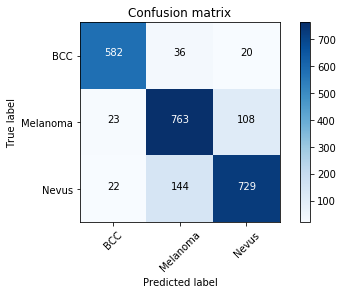

In [ ]:
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_test, axis=1)

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
BS=16
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['BCC','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))


# ----------------------------
'''
# Perform predictions and evaluate the model on the test set

# Obtain predicted class indices from the rounded predictions
pred = np.argmax(rounded_predictions, axis=1)

# Obtain true class indices from the one-hot encoded labels
rounded_labels = np.argmax(y_test, axis=1)

# Predict the values from the test set
pred_Y = model.predict(x_test, batch_size=16, verbose=True)

# Define batch size for plotting confusion matrix
BS = 16

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names = ['BCC', 'Melanoma', 'Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=BS)
# Convert predictions classes to one-hot vectors
Y_pred_classes = np.argmax(pred_Y, axis=1)
# Convert validation observations to one-hot vectors
# compute the confusion matrix
rounded_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(3))


'''

In [ ]:
# predictions on the test set and display a classification report

# Predict the values from the test set
predIdxs = model.predict(x_test, batch_size=BS)

# Find the index of the label with the largest predicted probability for each image
predIdxs = np.argmax(predIdxs, axis=1)
rounded_labels=np.argmax(y_test, axis=1)

# Display a classification report
print(classification_report(rounded_labels, predIdxs,target_names=['BCC','Melanoma','Nevus']))


             precision    recall  f1-score   support

        BCC       0.93      0.91      0.92       638
   Melanoma       0.81      0.85      0.83       894
      Nevus       0.85      0.81      0.83       895

avg / total       0.86      0.85      0.85      2427



152/152 [==============================] - 52s 345ms/step


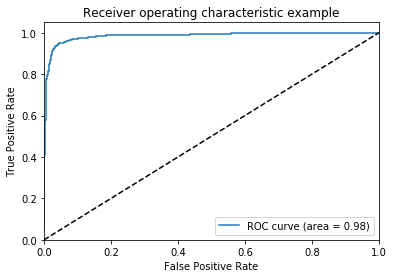

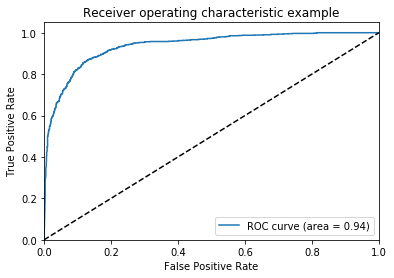

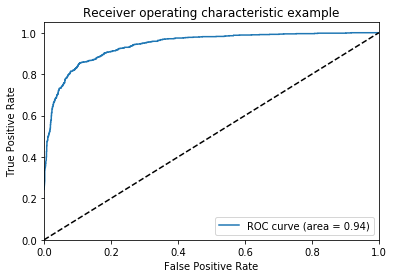

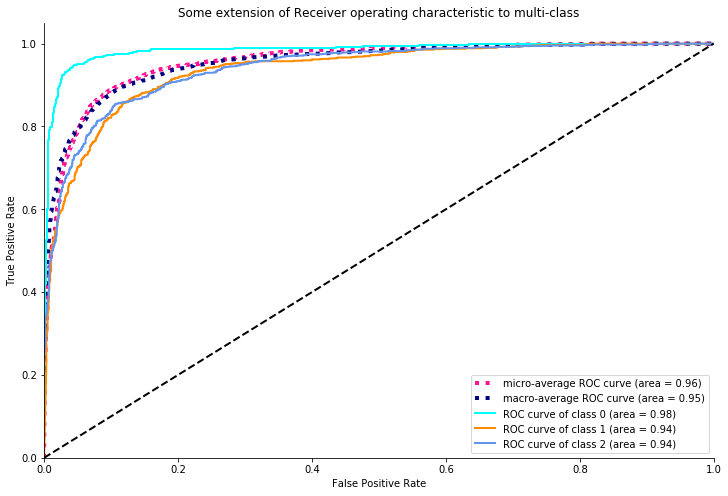

In [ ]:
# -------------------------
# plot the ROC curves for each class
y_test = np.array(y_test)
n_classes = 3
pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

## Model Evaluation onTesting Data

In [ ]:
# Set the path to the new dataset directory
F_DIR = "ISIC_2019_ML/Test_Data_3"

In [ ]:
# Loading Model
model = load_model(I_Var+'/model_v1.h5')

In [ ]:
# Read and preprocess the new dataset

new_data = []
True_labels = []

# Iterate through the files in the new dataset directory
for filename in os.listdir(F_DIR):
    try:
        image_path = os.path.join(F_DIR, filename)
        image = cv2.imread(image_path)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        new_data.append(np.array(size_image))

        # Extracting the labels based on the first character of the filename
        if filename[0] == 'b':
            True_labels.append(0)
        elif filename[0] == 'm':
            True_labels.append(1)
        elif filename[0] == 'n':
            True_labels.append(2)

    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

In [ ]:
# Convert the list to a numpy array
new_data = np.array(new_data)

# Normalize the new dataset
new_data = new_data.astype('float32') / 255

In [ ]:
# Make predictions on the new dataset
new_predictions = model.predict(new_data)

In [ ]:
# Convert the predictions to class labels
predicted_labels = np.argmax(new_predictions, axis=1)

In [ ]:
# Print the predicted labels
print("Predicted Labels:", predicted_labels)

Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 

In [ ]:
# true_labels_CN1 = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
true_labels_CN1 = True_labels

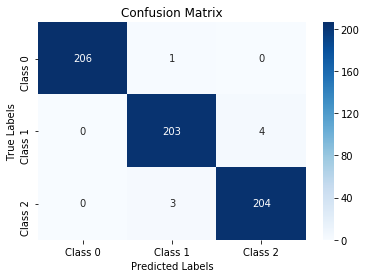

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels_CN1, predicted_labels)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

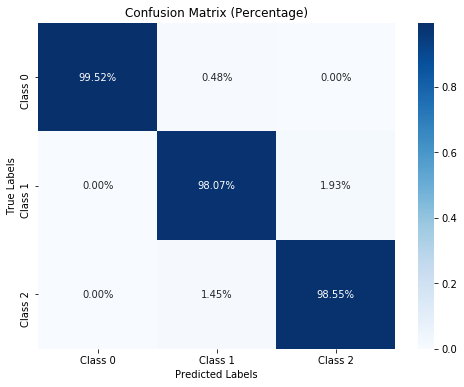

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels_CN1, predicted_labels)

# Convert to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))

# heatmap with annotations and percentages
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])

plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Classification Report
class_names = ["Class 0", "Class 1", "Class 2"]
report = classification_report(true_labels_CN1, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
             precision    recall  f1-score   support

    Class 0       1.00      1.00      1.00       207
    Class 1       0.98      0.98      0.98       207
    Class 2       0.98      0.99      0.98       207

avg / total       0.99      0.99      0.99       621



In [ ]:
# Calculate the overall accuracy
overall_accuracy = accuracy_score(true_labels_CN1, predicted_labels)
print(f'Overall Accuracy: {overall_accuracy:.4f}')

Overall Accuracy: 0.9871
